In [1]:
from math import atan 
from math import log
#from math import radians as rad
#from math import degrees as deg

In [2]:
def f(x):
    return 0.65 - 0.75/(1+x**2) - 0.65*x*atan(1/x) if x != 0\
    else 0.65 - 0.75/(1+x**2) # because I can't divide by zero

In [3]:
f(0),f(0.5)

(-0.09999999999999998, -0.30982333328307937)

# 1.

## Exhaustive search

In [4]:
class Exhaustive_search:
    def __init__(self,a,b,n):
        self.a,self.b,self.n = a,b,n
        self.evalF = 0
        
    def F(self,x):
        self.evalF += 1
        return 0.65 - 0.75/(1+x**2) - 0.65*x*atan(1/x) if x != 0\
        else 0.65 - 0.75/(1+x**2) # because I can't divide by zero

    def minimo(self):
        a,b,n,F = self.a,self.b,self.n,self.F
        if n == 0:
            return ('({},{})\n{}'.format("%.3f"%a,"%.3f"%b,0))
    
        step = (b-a)/n


        x1 = a
        x2 = x1+step
        x3 = x2+step
        if x1 == 0:
            x1 = x1+step
            x2 = x1+step
            x3 = x2+step
            #evalF += 1
        elif x2 == 0:
            x1 = x1+step+step
            x2 = x1+step
            x3 = x2+step
            #evalF += 2
        elif x3 == 0:
            x1 = x1+step+step+step
            x2 = x1+step
            x3 = x2+step
            #evalF += 3
            
        f1,f2,f3 = F(x1), F(x2), F(x3)
        while x3 <= b:
            if f1 >= f2 and f2 <= f3:
                return ('({},{})\n{}'.format("%.3f"%x1,"%.3f"%x3,self.evalF))#x3-x1
            x1 = x2
            x2 = x3
            x3 = x3 + step
            if x3 == 0:
                x1 = x3+step
                x2 = x1+step
                x3 = x2+step
            f1 = f2
            f2 = f3
            f3 = F(x3)
        return('NO SE ENCONTRÓ')


In [5]:
print(Exhaustive_search(0,3,6000).minimo())

(0.481,0.482)
963


## Division of intervals by half

In [6]:
class Division_by_half:
    def __init__(self,a,b,epsilon):
        self.a,self.b,self.epsilon = a,b,epsilon
        self.evalF = 0
        self.fs = {}
    
    def f(self,x):
        self.evalF += 1
        return 0.65 - 0.75/(1+x**2) - 0.65*x*atan(1/x) if x != 0\
        else 0.65 - 0.75/(1+x**2) # because I can't divide by zero
    
    def getf(self,x):
        fs,f = self.fs, self.f
        if x in fs.keys():
            return fs[x]
        else:
            fs[x] = f(x)
            return fs[x]

    

    def minimo(self):
        a,b,epsilon,getf = self.a,self.b,self.epsilon,self.getf
        x_m = (a+b)/2
        L = abs(b-a)
        while L > epsilon:
            x1 = a + L/4
            x2 = b - L/4
            fx1 = getf(x1)
            fx2 = getf(x2)
            fxm = getf(x_m)

            if fx1 < fxm:
                b = x_m
                x_m = x1

            elif fx2 < fxm:
                a = x_m
                x_m = x2

            else:
                a = x1
                b = x2

            L = abs(b-a)

        return ('({},{})\n{}'.format("%.3f"%a,"%.3f"%b,self.evalF))


In [7]:
print(Division_by_half(0,3,0.001).minimo())

(0.480,0.481)
25


## Fibonacci search

In [33]:
#a,b,n = input().split(',') 
#a,b,n = float(a), float(b), int(n)

class Fibonacci_search:
    def __init__(self,a,b,n):
        self.a,self.b,self.n = a,b,n
        self.evalF = 0
        self.fibo_dict = {}
        self.fs = {}
        
    def fibo_iter_dict(self,n):
        self.fibo_dict[0] = 1
        self.fibo_dict[1] = 1
        if n == 0 or n == 1:
            return self.fibo_dict
        f0 = 1
        f1 = 1
        fn = -1
        for i in range(n-1):
            fn = f0 + f1
            self.fibo_dict[i+2] = fn
            f0 = f1
            f1 = fn
        return self.fibo_dict


    def f(self,x): 
        self.evalF += 1
        self.fs[x] = 0.65 - 0.75/(1+x**2) - 0.65*x*atan(1/x) if x != 0\
        else 0.65 - 0.75/(1+x**2) # because I can't divide by zero
        #print(fs[x])
        return self.fs[x]


    def get_f(self,x):
        fs = self.fs
        if x in fs.keys():
            #print(x)
            fx = fs[x]
            #del fs[x]
            return fx
        else:
            fs[x] = self.f(x)
            return fs[x]

    def minimo(self):
        a,b,n = self.a, self.b, self.n
        L = abs(b-a)
        F = self.fibo_iter_dict(n)
        k = 2

        while k <= n:
            Lks = F[n-k]/F[n]*L
            x1 = a + Lks#round(a + Lks,10)
            x2 = b - Lks#round(b - Lks,10)
            if self.get_f(round(x1,10)) > self.get_f(round(x2,10)):
                a = x1
            else:
                b = x2
            k += 1

        return '({},{})\n{}'.format("%.3f"%a,"%.3f"%b,self.evalF+1)

In [34]:
print(Fibonacci_search(0,3,18).minimo())

(0.480,0.481)
18


## Golden section search

# 2.

### Exhaustive search:

$\epsilon = \frac{2(b-a)}{n}$

$n = \frac{2(b-a)}{\epsilon}$

In [23]:
2*(3-0)/0.001

6000.0

### Division of intervals by half

$\left(\frac{1}{2}\right)^\frac{n}{2}L_0 = \epsilon$

$\left(\frac{1}{2}\right)^\frac{n}{2} = \frac{\epsilon}{L_0}$

$\log_\frac{1}{2} \left(\left(\frac{1}{2}\right)^\frac{n}{2}\right) = \log_\frac{1}{2} \left( \frac{\epsilon}{L_0}\right)$

$\frac{n}{2} = \log_\frac{1}{2} \left(\frac{\epsilon}{L_0}\right)$

$n = 2\log_\frac{1}{2} \left(\frac{\epsilon}{L_0}\right)$

In [25]:
2*log(0.001/3-0,1/2)

23.101493570766486

23.1, es decir 24 y considerando que la primera iteración hace 1 evaluación extra(tengo que checar eso), ya se hacen 25 evaluaciones que son las que marca el algoritmo

### Fibonacci search

$\frac{1}{F_n}L = \epsilon$ 

$F_n = \frac{L}{\epsilon}$

In [33]:
(3-0)/0.001

3000.0

In [38]:
fibo_dict = fibo_iter_dict(500)
fibo_dict[500]

225591516161936330872512695036072072046011324913758190588638866418474627738686883405015987052796968498626

In [41]:
n = 0
while True:
    if fibo_dict[n] >= 3000:
        print(n)
        break
    n += 1

18


# 3.

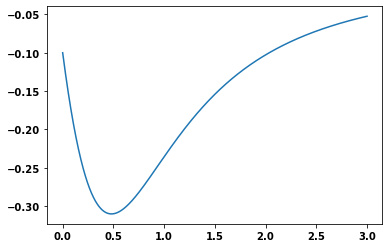

In [17]:
import matplotlib.pyplot as plt
import numpy as np
xs = np.arange(0,3,0.001)
xlist = xs
ylist = [f(i) for i in xs]
plt.plot(xlist, ylist)
plt.show()

# 4.

In [35]:
print(Exhaustive_search(0,3,6000).minimo())

(0.481,0.482)
963


In [36]:
print(Division_by_half(0,3,0.001).minimo())

(0.480,0.481)
25


In [37]:
print(Fibonacci_search(0,3,18).minimo())

(0.480,0.481)
18
